### Mean-intensity: plane parallel approximation

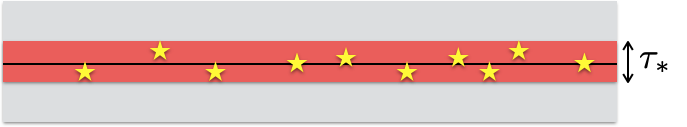

Imagine a plane-parallel slab with spatially uniform dust opacity (per unit mass) $\kappa$ and a density profile $\rho (z)$. The optical depth in the vertical direction is $\tau (z) = \int_0^z \rho \kappa dz$. Assume that a star-forming gas is confined to a layer $-\tau_*/2 < \tau < \tau_*/2$ and emits FUV radiation with constant volume emissivity. Denote the luminosity per unit area as $\Sigma_{\ast}$. Then, the intensity at $z$ due to a layer of thickness $\Delta \tau^{\prime}$ located at $z^{\prime} (< z)$ is
\begin{equation}
    \Delta I(z; \mu) = \dfrac{\Sigma_* \Delta \tau^{\prime}}{4\pi |\mu|\tau_*} e^{-(\tau(z) - \tau^{\prime}(z^{\prime}))/|\mu|}
\end{equation}
The mean intensity is
\begin{align}
\Delta J(z) & = \dfrac{1}{4\pi} \int dI(z; \mu) d\Omega \\ 
& = \dfrac{1}{2}\dfrac{\Sigma_* \Delta \tau^{\prime}}{4\pi \tau_*} \int_0^1 \dfrac{e^{-(\tau - \tau^{\prime})/\mu}}{\mu} d\mu \\ 
& =  \dfrac{1}{2}\dfrac{\Sigma_* \Delta \tau^{\prime}}{4\pi \tau_*} E_1(|\tau - \tau^{\prime}|)
\end{align}
where $E_n(x) = \int_0^1 e^{-x/\eta} \eta^{n-2} d\eta$ is the exponential integral. The mean intensity inside the slab due to the entire slab is then
\begin{align}
    J(\tau(z)) & = \dfrac{\Sigma_*/(4\pi)}{2\tau_*} \left( \int_0^{\tau_*/2-\tau} E_1(\tau^{\prime}) d\tau^{\prime} + \int_0^{\tau_*/2 + \tau} E_1(\tau^{\prime}) d\tau^{\prime} \right) \\
    & = \dfrac{\Sigma_*/(4\pi)}{2\tau_*} \left( 2 - E_2(\tau_*/2 - \tau) - E_2(\tau_*/2 + \tau) \right)
\end{align}
where we have used $d E_2(x)/dx = - E_1(x)$ and $E_2(0) = 1$. Outside the slab, 
\begin{equation}
    J(\tau(z)) = \dfrac{\Sigma_*/(4\pi)}{2\tau_*} \left( E_2(\tau - \tau_*/2) - E_2(\tau + \tau_*/2) \right)
\end{equation}
The mean intensity at the midplane is $J_0 = \Sigma_*/(4\pi \tau_*) ( 1 - E_1(\tau_*/2) )$ (Ostriker et al. 2010).



##### Plane-parallel approximation: model 1

Superposition of thin layer with thickness $\Delta z$ with $\tau_{\rm SF}$.

\begin{equation}
J_{\rm FUV}(z) \approx \sum_{\rm i} \frac{E_1(\tau_{\rm i}({\rm from}\;z_i\;{\rm to}\;z))}{2} \times \dfrac{\Sigma_{\rm FUV,i}}{4\pi}
\end{equation}


##### Plane-parallel approximation: model 2

- Compute $\Sigma_{\rm FUV}/(4\pi) = L_{\rm FUV,tot}/({\rm Area})/4\pi$

- Determine the thickness of emitting layer $(z_{\rm *,min}, z_{\rm *,max})$ and optical depth $\tau_{*} = \int_{z_{\rm min}}^{z_{\rm max}} \langle \rho \rangle \kappa_{\rm d}dz$

- Use analytic solution

$$J_{\rm FUV}(\tau; \tau_*) = \dfrac{\Sigma_{\rm FUV}/(4\pi)}{2\tau_{*}} (E_2(\tau - \tau_*/2) - E_2(\tau + \tau_*/2))$$

outside the slab ($|\tau| > \tau_*/2$)

$$J_{\rm FUV}(\tau; \tau_*) = \dfrac{\Sigma_{\rm FUV}/(4\pi)}{2\tau_{*}} (2 - E_2(\tau_*/2 - \tau) - E_2(\tau_*/2 + \tau))$$

inside the slab ($|\tau| < \tau_*/2$)

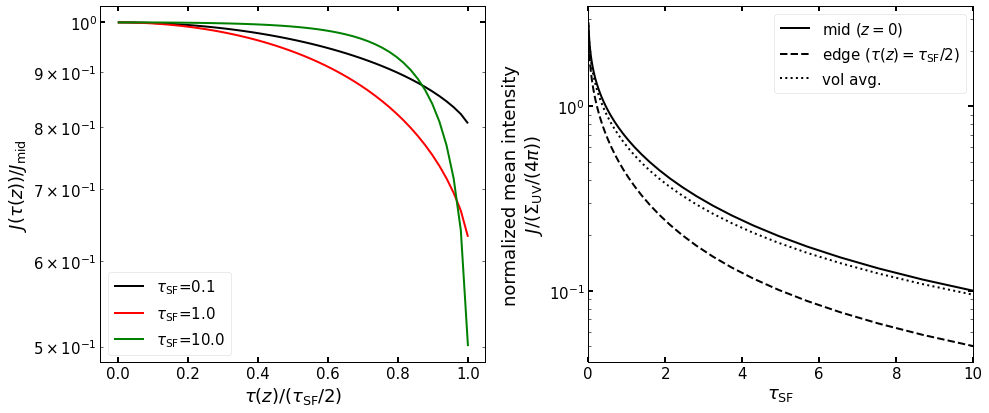

In [1]:
from pyathena.tigress_ncr.rt_plane_parallel import *

pa.set_plt_fancy()
# plt.rcParams['font.size'] = 12

tau_SF = np.logspace(-2, 1)
J_mid = J_over_JUV_inside_slab(0.0,tau_SF)
J_edge = J_over_JUV_inside_slab(0.5*tau_SF,tau_SF)
J_avg = J_over_JUV_avg_slab(tau_SF)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

plt.sca(axes[0])
tau_SF2 = np.array([0.1, 1.0, 10.0])
colors = ['k','r','g']

for tau_SF_,color in zip(tau_SF2,colors):
    tau = np.linspace(0,0.5*tau_SF_)
    J_z = J_over_JUV_inside_slab(tau,tau_SF_)
    plt.plot(tau/(0.5*tau_SF_),J_z/max(J_z),c=color,label=r'$\tau_{{\rm SF}}$={0:.1f}'.format(tau_SF_))

plt.legend()
plt.yscale('log')
plt.xlabel(r'$\tau(z)/(\tau_{\rm SF}/2)$')
plt.ylabel(r'$J(\tau(z))/J_{\rm mid}$')

plt.sca(axes[1])
#plt.plot(tau_SF,yy_mid/yy_edge,'k-')
plt.plot(tau_SF,J_mid,'k-',label='mid ($z=0$)')
plt.plot(tau_SF,J_edge,'k--',label=r'edge ($\tau(z) = \tau_{{\rm SF}}/2$)')
plt.plot(tau_SF,J_avg,'k:',label='vol avg.')
plt.xlim(0,10)
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\tau_{\rm SF}$')
plt.ylabel('normalized mean intensity\n' + r'$J/(\Sigma_{\rm UV}/(4\pi))$')

plt.tight_layout()

LoadSimTIGRESSNCR-WARNING: Could not pickle to /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR/starpar/starpar_0000.p.


Permission Error:  [Errno 13] Permission denied: '/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR/starpar'
mdl R8_8pc   nsrc 20 eps8.0_xymax1024_zt300  epsPP  1e-08  L_FUV/10^6 21.7  nproc 448  xymax,zmax,eps,zt 1024.0 4000.0 1e-08 300.0


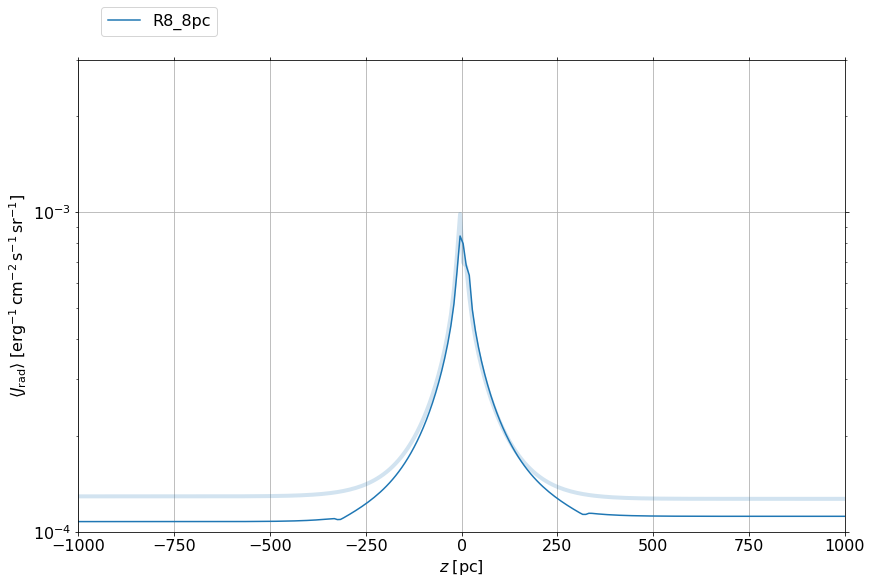

In [3]:
from pyathena.tigress_ncr.rt_plane_parallel import calc_Jrad_pp

models = dict(
    R8_8pc='/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR/',
)

savdir = '/tigress/jk11/NCR-RAD'
if not osp.exists(savdir):
    os.makedirs(savdir)

sa = pa.LoadSimTIGRESSNCRAll(models)
num = 0

fig, ax = plt.subplots(1, 1, figsize=(12,8), constrained_layout=True)
plt.sca(ax)
for i,mdl in enumerate(sa.models):
    s = sa.set_model(mdl)
    if mdl.startswith('R8_8pc'):
        ls='-'
    else:
        ls='--'

    #df = read_rad_lost(osp.join(s.basedir,'rad_lost.txt'))
    rsp = s.read_starpar(num=num, savdir=savdir, force_override=False)
    zpa = s.read_zprof('whole', savdir=savdir, force_override=False)
    zp = zpa.isel(time=0)
    prad = s.par['radps']
    if prad['eps_extinct'] != 0.0:
        label = 'eps{0:.1f}'.format(np.abs(np.log10(prad['eps_extinct'])))
    else:
        label = 'eps0'
    label += '_xymax{0:g}'.format(prad['xymaxPP'])
    if s.par['configure']['RaytPlaneParallel'] == 'yes':
        label += '_zt{0:g}'.format(prad['zp'])

    #for f in ('LW','PE'):
    for f in ('PE',):
        l, = plt.semilogy(zp.z, zp[f'Jrad_{f}'], ls=ls, label=mdl, alpha=1.0, lw=1.5)
        Jrad, zpc = calc_Jrad_pp(s, num)
        plt.semilogy(zpc, Jrad[f], ls=ls, c=l.get_color(), lw=4, alpha=0.2)
    
    print('mdl', mdl, '  nsrc', rsp['nsrc'], label, ' epsPP ', prad['eps_extinct'], 
          r' L_FUV/10^6 {0:.1f}'.format(rsp['L_FUV_tot']/1e6),
          # r' time_rayt [s]', pa.read_timeit(s.files['timeit'])['rayt'].iloc[-1], 
          r' nproc', s.par['domain1']['NGrid_x1']*s.par['domain1']['NGrid_x2']*s.par['domain1']['NGrid_x3'],
          r' xymax,zmax,eps,zt',prad['xymaxPP'],prad['zmaxPP'],prad['eps_extinct'],prad['zp'])

plt.gca().set(
    xlabel=r'$z\;[{\rm pc}]$',
    ylabel=r'$\langle J_{\rm rad} \rangle\;[{\rm erg}^{-1}\,{\rm cm}^{-2}\,{\rm s}^{-1}\,{\rm sr}^{-1}]$')
plt.legend(loc=(0.03,1.05))
plt.xlim(-1000,1000)
plt.ylim(1e-4,3e-3)
plt.grid()